# Trabalho Computacional 2
- **Inteligência Computacional Aplicada**
- **Aluno**: Matheus Araujo dos Santos (matheus.santos@lapisco.ifce.edu.br)
- Programa de Pós-Graduacão em Engenharia Elétrica (PPGEE)
- Universidade Federal do Ceará, *Campus* do Pici, Fortaleza, Ceará, Brasil

## Questão 1 - Estimação da Curva de Potência com Regressão Polinomial

Os modelos de regressão linear polinomial são usados, em geral, como funções aproximadoras, e a equação de regressão é ajustada ao conjunto de dados em questão [1]. O modelo matemático formulado para representação dos dados é dito linear se obedece a seguinte equação [1]:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \varepsilon 
$$

Onde $\beta_0$ é o intercepto e $\beta_1$, $\beta_2$, $\beta_3$ são os coeficientes de regressão associados às variáveis preditoras. $\varepsilon$ é o termo de erro aleatório.

No caso da equação acima, a equação é de grau 3, porém o grau do polinômio descritor é da ordem da quantidade de variáveis regressoras do problema em questão.

Nessa implementação foram usados dois tipos de estimadores lineares: o de mínimos quadrados ordinários (MQO) e o de mínimos quadrados regularizados (MQR). O estimado de mínimos quadrados ordinários obedece a equação a seguir [2]:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

Enquanto o estimador de mínimos quadrados regularizados (chamado também de Ridge e Lasso) obedece a equação a seguir [2]:

$$
\hat{\beta}_{\text{ridge}} = (X^T X + \lambda I)^{-1} X^T y 
$$

### Sobre o modelo
Foram gerados 10 modelos regressores polinomiais, um para cada grau a partir do 1º. Para cada grau acima do primeiro, foi feita a transformação polinomial (elevação dos valores ao grau do polinômio) do vetor de dados de velocidade, para que fique da dimensão do respectivo grau. Para o grau 1, apenas foi acrescido uma coluna de 1's (vetor de *bias*). Além disso, o estimador escolhido foi o de mínimos quadrados ordinários (MQO). Por fim, para cada modelo foram geradas as três métricas solicitadas (R2, R2 ajustado e Critério da Informação de Akaike - AIC).

### Sobre o dataset
O *dataset* utilizado é um dataset de dados de Potência de um aerogerador em função da sua velocidade. São um total de 2250 dados e, por ter apenas uma variável regressora, esse é um modelo originalmente de ordem 1.

### Resultados
É notório que conforme o grau do polinômio aumenta, a curva melhor se adequa aos dados em questão. A partir do grau 4, a curva fica quase que totalmente sobreposta aos dados, e conforme o grau aumenta, ela continua a se adequar nas nuances do conjunto de dados mas mudando pouco após o 4º grau.

Da mesma forma, as métricas monitoradas crescem gradualmente (no caso do R2 e R2 ajustado) chegando ao ápice de 0.97 no grau 4 e subindo na faixa da quarta casa decimal para graus acima do 4º. O AIC, de forma inversa, decresce até o grau 4 e se mantém na faixa de 30150 para os graus subsequentes.

As curvas de predição dos modelos de regressão sobrepostas aos dados reais podem ser vistas nas imagens abaixo, assim como os gráficos que ilustram as métricas (critérios) em função da evolução do grau do polinômio.

**Os critérios forneceram resultados iguais para a ordem do modelo polinomial?**

Não, os critérios foram mostrando modelos mais adequados ao conjunto de dados de aerogeradores conforme o grau do polinômio foi aumentando. 

**Referências:**
1. HINES, W. W. et al. *Probabilidade e Estatística na Engenharia*. Quarta. [S.l.]: LTC, 2006.
2. GOLUB, G. H.; VAN LOAN, C. F. *Matrix Computations*. 3a.. ed. [S.l.]: The Johns Hopkins
University Press, 1996.The Johns Hopkins
University Press, 1996..

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Carregando dataset
dataset = np.loadtxt("dataset/aerogerador.dat")
dataset

array([[  0. ,   0. ],
       [  0. ,   0. ],
       [  0. ,   0. ],
       ...,
       [ 14.1, 508. ],
       [ 14.3, 508. ],
       [ 14.4, 503. ]])

In [2]:
vel = np.expand_dims(dataset[:, 0], axis=1)  # Velocidades
Pot = np.expand_dims(dataset[:, 1], axis=1)  # Potências

vel.shape, Pot.shape

((2250, 1), (2250, 1))

In [3]:
from sklearn.metrics import r2_score

def criteria_metrics(type, y_true, y_pred, X, num_coeff):
    if type == "R2":
        return r2_score(y_true, y_pred)
    elif type == "Adj_R2":
        return 1 - (1 - r2_score(y_true, y_pred)) * ((len(y_true) - 1) / (len(y_true) - X.shape[1] - 1))
    elif type == "AIC":
        res = y_true - y_pred
        sum_res = np.sum(res**2)
        return len(y_true) * np.log(sum_res) + 2 * num_coeff

def polynomial_matrix(k, X):
    if k == 1:
        return np.column_stack((np.ones(X.shape[0]), X)) 
    else:
        polynomials = [X ** pol for pol in range(0, k + 1)]
        return np.column_stack(polynomials)
        
def estimator_by_type(type, X, y):
    if type == 'OLS':
        return np.linalg.pinv(X) @ y
    elif type == 'RLS':
        return np.linalg.inv(X.T @ X + 0.01 * np.eye(X.shape[1])) @ X.T @ y           

def train_multi_linear_regressor(X_train, y_train, least_square_type, criteria_type, degrees_list):
    metrics_list = []
    y_pred_list = []
    for degree in degrees_list:
        X = polynomial_matrix(degree, X_train)
        y = y_train.reshape(-1, 1)
        
        estimator = estimator_by_type(least_square_type, X, y)
        y_pred = X @ estimator

        metric = criteria_metrics(criteria_type, y_train, y_pred, X, estimator.shape[0])
        print("k={}, {}={}".format(degree, criteria_type, metric))
        metrics_list.append(metric)
        y_pred_list.append(y_pred)
        
    return metrics_list, y_pred_list


k=1, R2=0.9291604695978946
k=2, R2=0.9434238833776911
k=3, R2=0.9690229223762249
k=4, R2=0.9737242419030897
k=5, R2=0.9737255940945313
k=6, R2=0.9737610288899472
k=7, R2=0.9738573977377819
k=8, R2=0.9739173184398965
k=9, R2=0.973917420063658
k=10, R2=0.9739404397270492


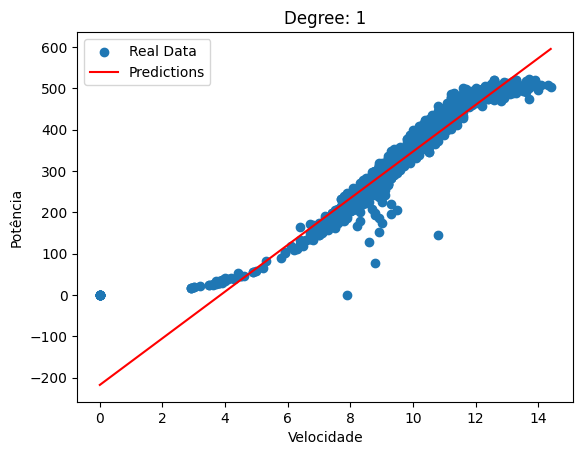

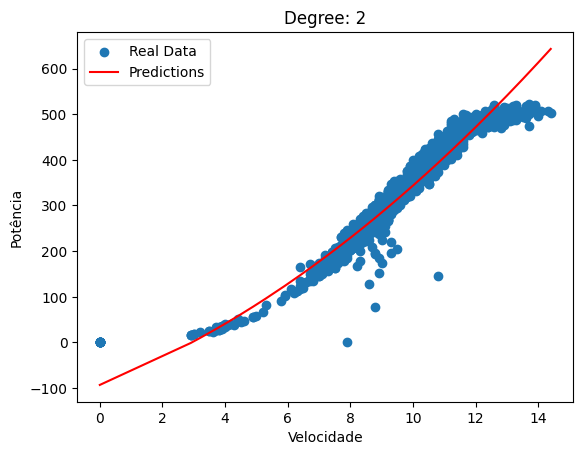

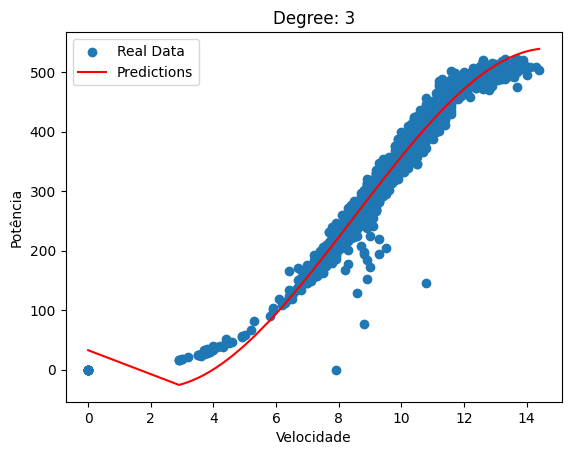

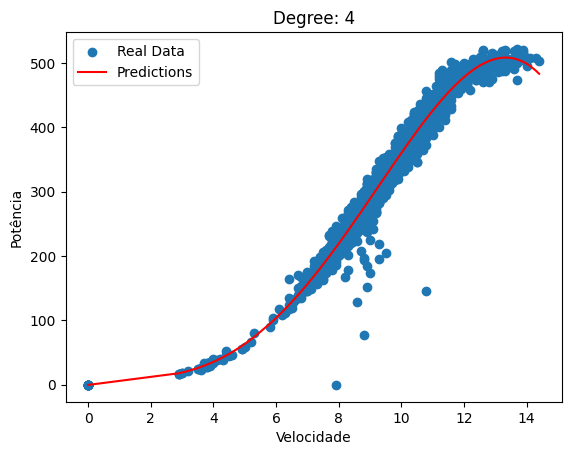

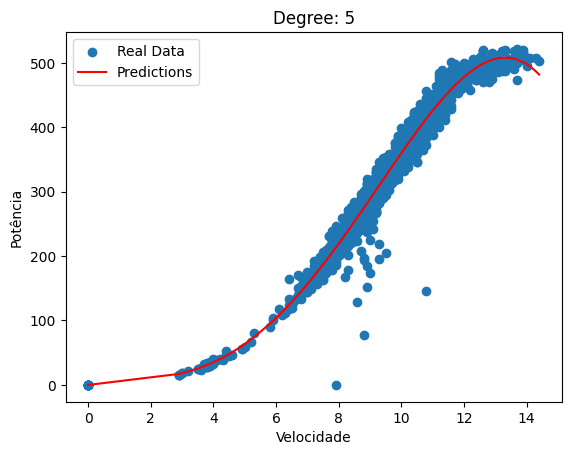

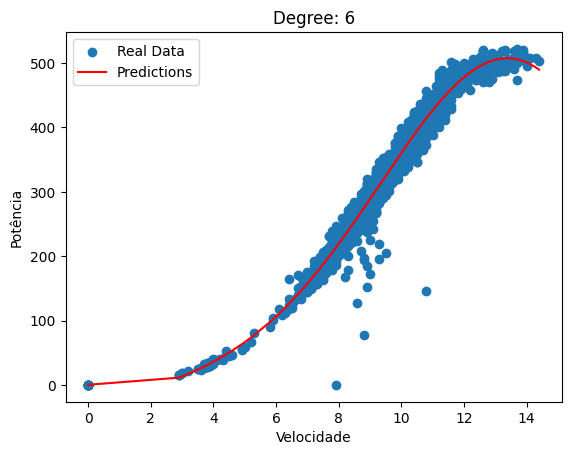

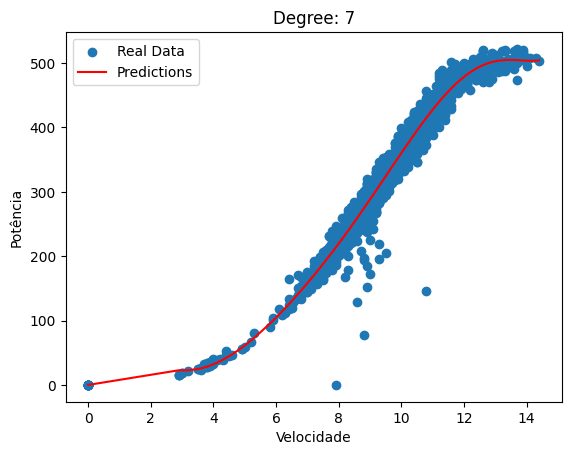

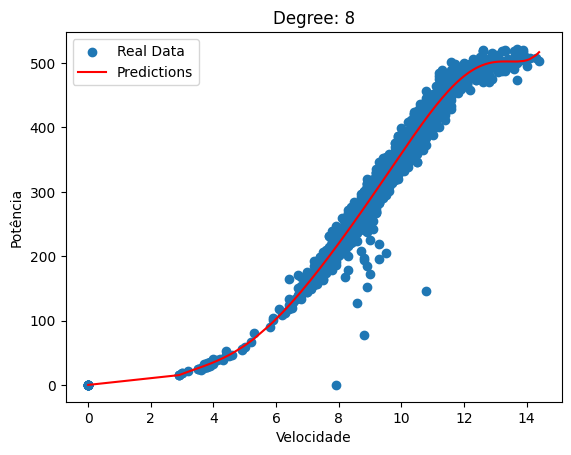

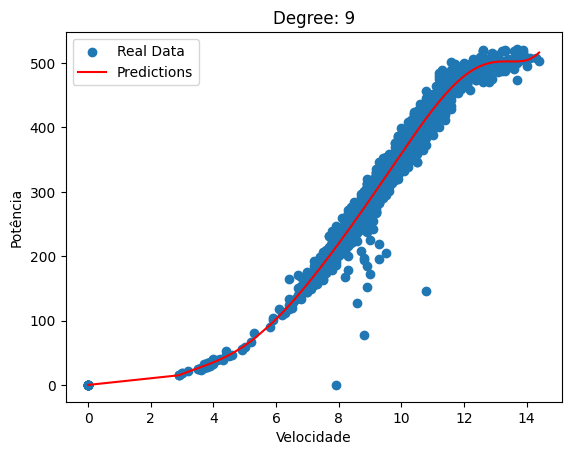

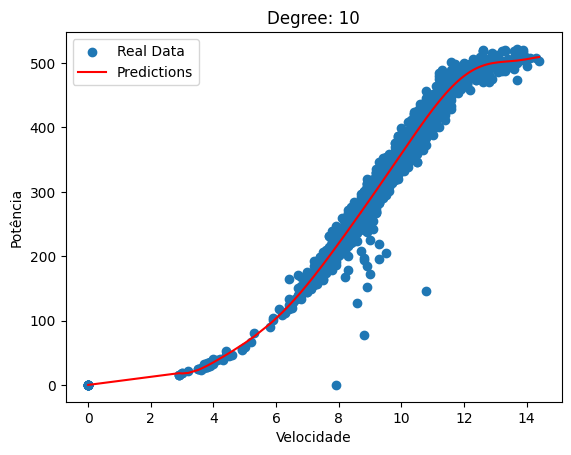

In [4]:
metric = "R2"
degrees_list = [i for i in range(1, 11)]
metrics, y_pred_list = train_multi_linear_regressor(X_train=vel, y_train=Pot, least_square_type="OLS", criteria_type=metric, degrees_list=degrees_list)

for i, degree in enumerate(degrees_list):
    
    X = polynomial_matrix(degree, vel)
    y = Pot.reshape(-1, 1)

    y_pred = y_pred_list[i]

    sorted_order = np.argsort(X[:, 1])
    X_sorted = X[sorted_order]
    y_pred_sorted = y_pred[sorted_order]
        
    plt.scatter(X[:, 1], y, label='Real Data')
    plt.plot(X_sorted[:, 1], y_pred_sorted, color='red', label='Predictions')
    plt.title("Degree: {}".format(degree))
    plt.xlabel('Velocidade')
    plt.ylabel('Potência')
    plt.legend()

    plt.show()

k=1, R2=0.9291604695978946
k=2, R2=0.9434238833776911
k=3, R2=0.9690229223762249
k=4, R2=0.9737242419030897
k=5, R2=0.9737255940945313
k=6, R2=0.9737610288899472
k=7, R2=0.9738573977377812
k=8, R2=0.9739173184398933
k=9, R2=0.9739174200636564
k=10, R2=0.9739404397267893


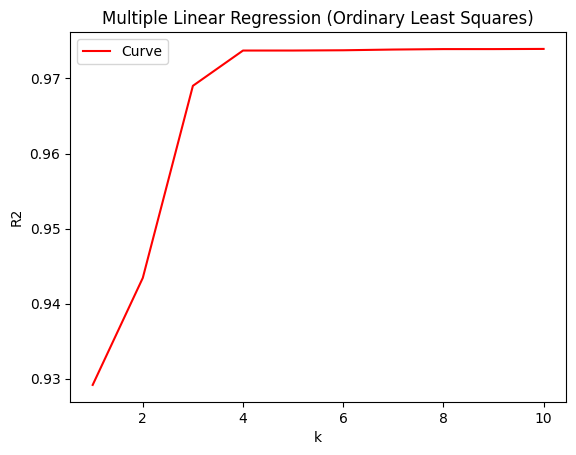

In [85]:
# R2 para k = [1, 10]
metric = "R2"
degrees_list = [i for i in range(1, 11)]
metrics = train_multi_linear_regressor(X_train=vel, y_train=Pot, least_square_type="OLS", criteria_type=metric, degrees_list=degrees_list)

plt.plot(degrees_list, metrics, color='red', label='Curve')
plt.title('Multiple Linear Regression (Ordinary Least Squares)')
plt.legend()
plt.xlabel("k")
plt.ylabel(metric)
plt.show()

k=1, Adj_R2=0.9290974170563706
k=2, Adj_R2=0.9433483142103416
k=3, Adj_R2=0.9689677293648685
k=4, Adj_R2=0.9736656952050128
k=5, Adj_R2=0.9736553103515831
k=6, Adj_R2=0.9736791052513342
k=7, Adj_R2=0.9737640729639759
k=8, Adj_R2=0.9738125219514822
k=9, Adj_R2=0.9738009279692557
k=10, Adj_R2=0.9738123543098969


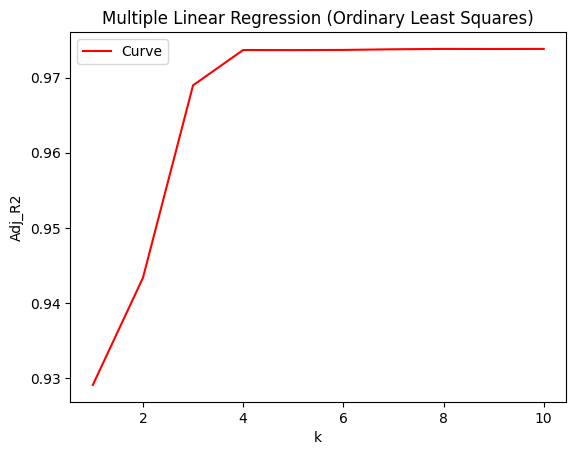

In [86]:
# Adjusted R2 para k = [1, 10]
metric = "Adj_R2"
degrees_list = [i for i in range(1, 11)]
metrics = train_multi_linear_regressor(X_train=vel, y_train=Pot, least_square_type="OLS", criteria_type=metric, degrees_list=degrees_list)

plt.plot(degrees_list, metrics, color='red', label='Curve')
plt.title('Multiple Linear Regression (Ordinary Least Squares)')
plt.legend()
plt.xlabel("k")
plt.ylabel(metric)
plt.show()

k=1, AIC=32376.690010884926
k=2, AIC=31872.82193590352
k=3, AIC=30519.558220941024
k=4, AIC=30151.206576800527
k=5, AIC=30153.090785316257
k=6, AIC=30152.05429037658
k=7, AIC=30145.77541907507
k=8, AIC=30142.61233985196
k=9, AIC=30144.603573348708
k=10, AIC=30144.616917442145


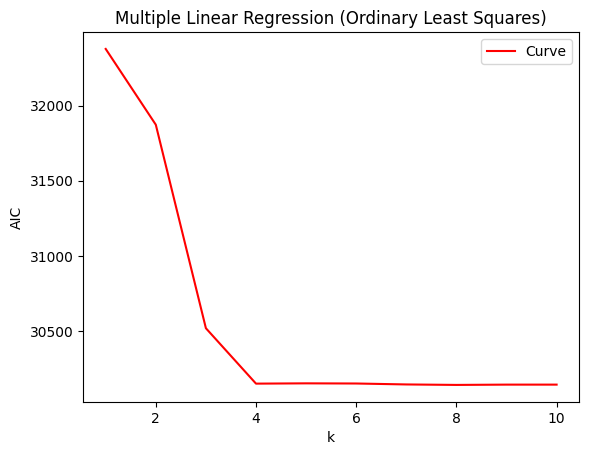

In [87]:
# AIC para k = [1, 10]
metric = "AIC"
degrees_list = [i for i in range(1, 11)]
metrics = train_multi_linear_regressor(X_train=vel, y_train=Pot, least_square_type="OLS", criteria_type=metric, degrees_list=degrees_list)

plt.plot(degrees_list, metrics, color='red', label='Curve')
plt.title('Multiple Linear Regression (Ordinary Least Squares)')
plt.legend()
plt.xlabel("k")
plt.ylabel(metric)
plt.show()